In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# IMPORT LIBRARIES
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import os 
os.listdir('drive/My Drive/animals')

['cats', 'panda', 'dogs']

In [63]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2,
                                                                   rescale=1./255
                                                                 )
train_data_gen = image_generator.flow_from_directory(directory='drive/My Drive/animals',
                                                     subset='training',
                                                     target_size=(150, 150)
                                                     )

test_data_gen = image_generator.flow_from_directory(directory='drive/My Drive/animals',
                                                   subset = 'validation',
                                                    target_size=(150, 150)
                                                    )

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    
])

In [65]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [66]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')> 0.80):
      print("\nAkurasi telah mencapai > 80%!")
      self.model.stop_training = True
callbacks = myCallback()

In [67]:
history = model.fit(
      train_data_gen ,  
      batch_size= 32,
      epochs=30,
      validation_data=test_data_gen ,
      validation_steps=5,
      verbose=1,
      callbacks=[callbacks])

Epoch 1/30
75/75 [==============================] - 137s 2s/step - loss: 0.9106 - accuracy: 0.5058 - val_loss: 0.7791 - val_accuracy: 0.5875
Epoch 2/30
75/75 [==============================] - 136s 2s/step - loss: 0.7521 - accuracy: 0.6137 - val_loss: 0.7541 - val_accuracy: 0.5688
Epoch 3/30
75/75 [==============================] - 135s 2s/step - loss: 0.6828 - accuracy: 0.6612 - val_loss: 0.6871 - val_accuracy: 0.6500
Epoch 4/30
75/75 [==============================] - 138s 2s/step - loss: 0.6374 - accuracy: 0.6800 - val_loss: 0.6761 - val_accuracy: 0.6438
Epoch 5/30
75/75 [==============================] - 135s 2s/step - loss: 0.5717 - accuracy: 0.7250 - val_loss: 0.6103 - val_accuracy: 0.7000
Epoch 6/30
75/75 [==============================] - 135s 2s/step - loss: 0.5441 - accuracy: 0.7321 - val_loss: 0.6164 - val_accuracy: 0.6750
Epoch 7/30
75/75 [==============================] - 136s 2s/step - loss: 0.5212 - accuracy: 0.7500 - val_loss: 0.6342 - val_accuracy: 0.6812
Epoch 8/30
75

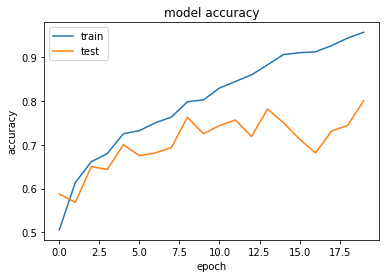

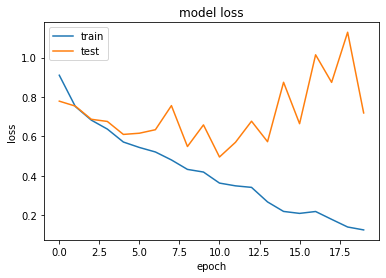

In [69]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpllxxza3m/assets


In [71]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)